In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the dataset
df = pd.read_csv('ToyotaCorolla - MLR.csv')


In [4]:

# Display basic statistics and information
print(df.describe())
print(df.info())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

In [16]:
# Data types and missing values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Price             1436 non-null   int64
 1   Age_08_04         1436 non-null   int64
 2   KM                1436 non-null   int64
 3   HP                1436 non-null   int64
 4   Automatic         1436 non-null   int64
 5   cc                1436 non-null   int64
 6   Doors             1436 non-null   int64
 7   Cylinders         1436 non-null   int64
 8   Gears             1436 non-null   int64
 9   Weight            1436 non-null   int64
 10  Fuel_Type_Diesel  1436 non-null   uint8
 11  Fuel_Type_Petrol  1436 non-null   uint8
dtypes: int64(10), uint8(2)
memory usage: 115.1 KB
None
Price               0
Age_08_04           0
KM                  0
HP                  0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Weight   

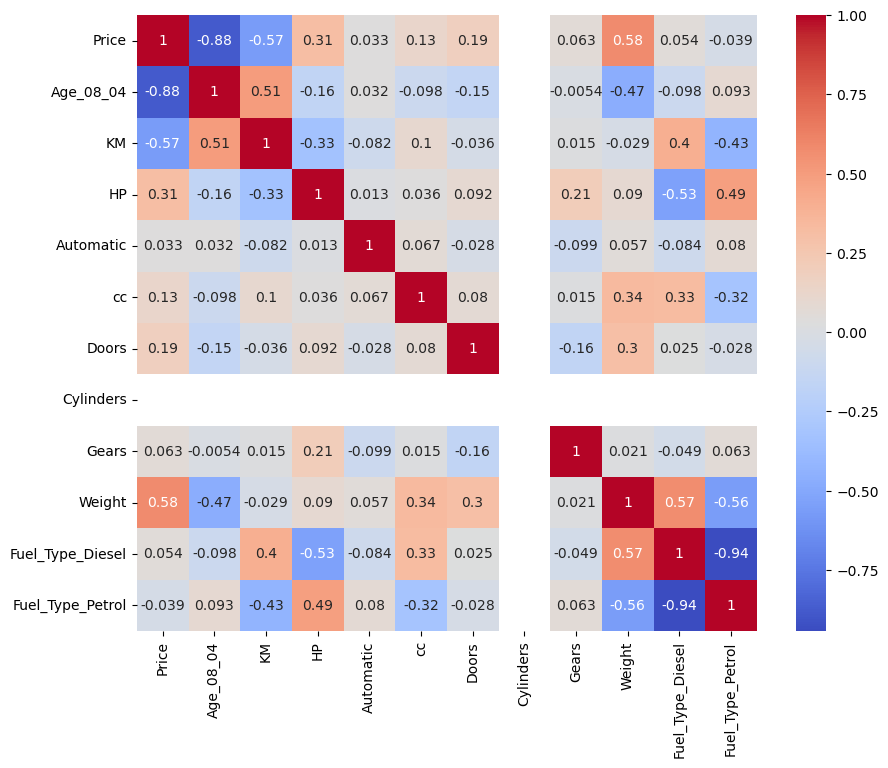

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


C:\Users\Reshma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


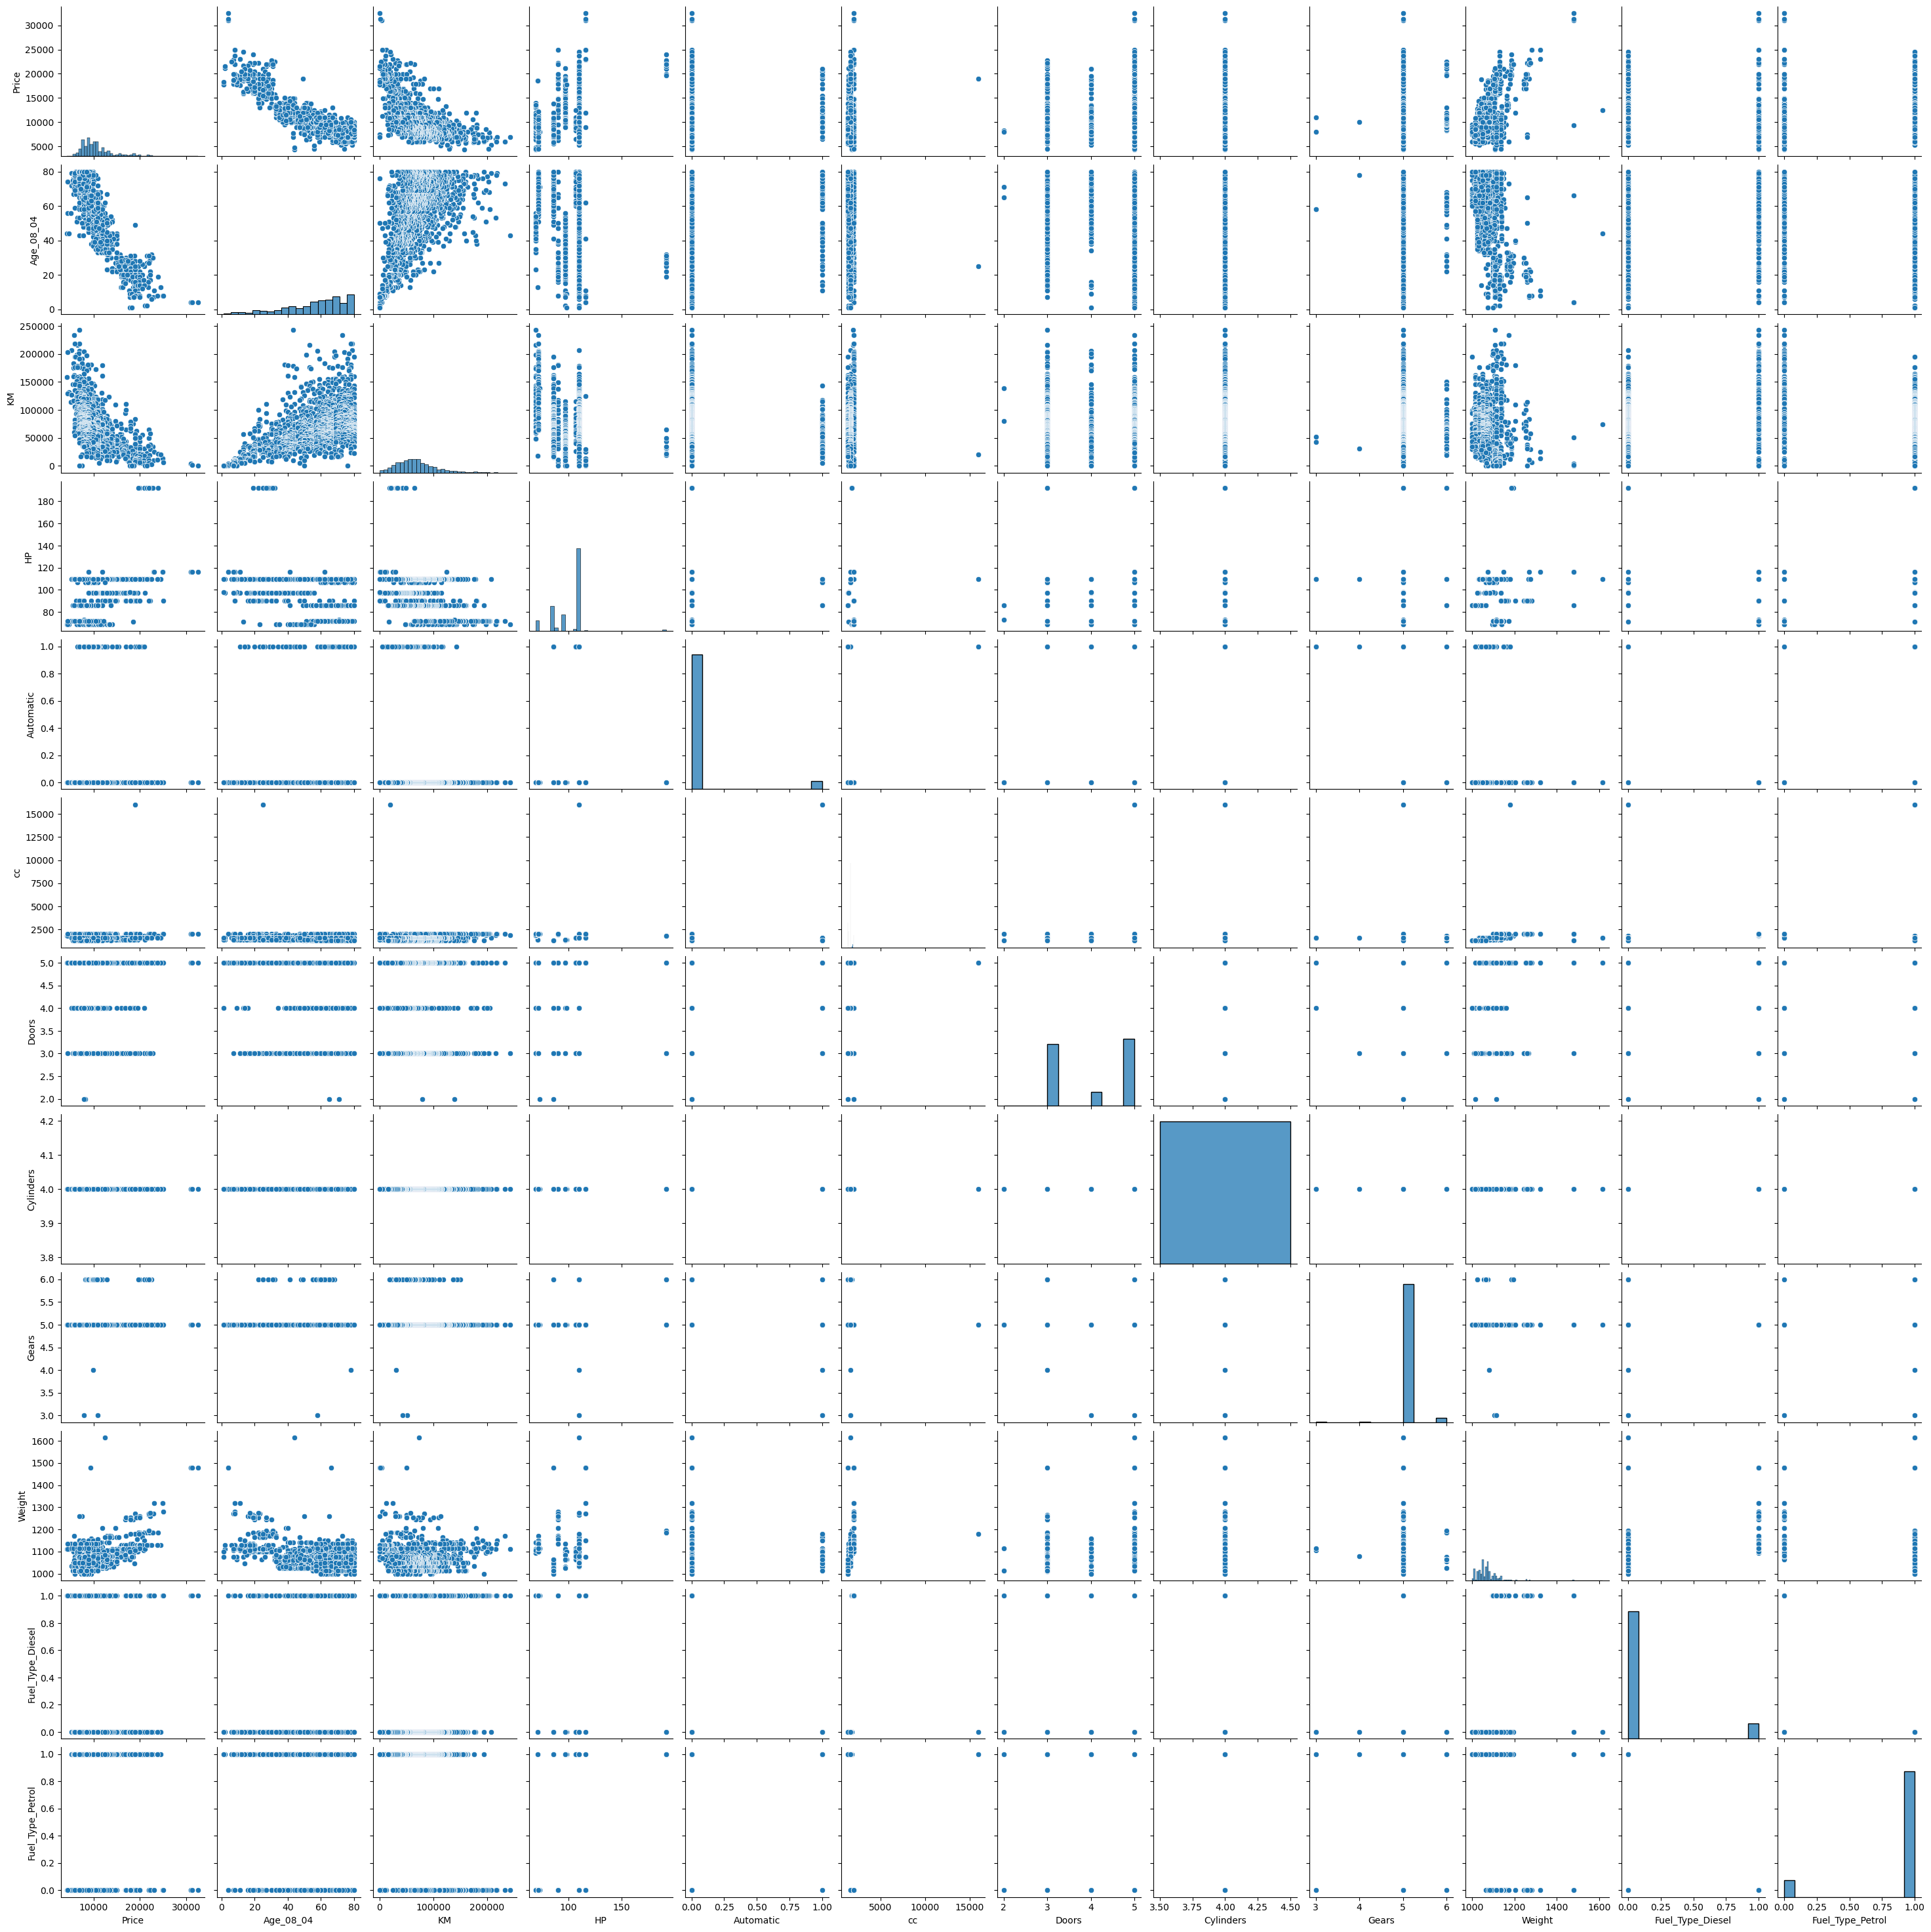

In [18]:
# Pair plot
sns.pairplot(df)
plt.show()

C:\Users\Reshma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


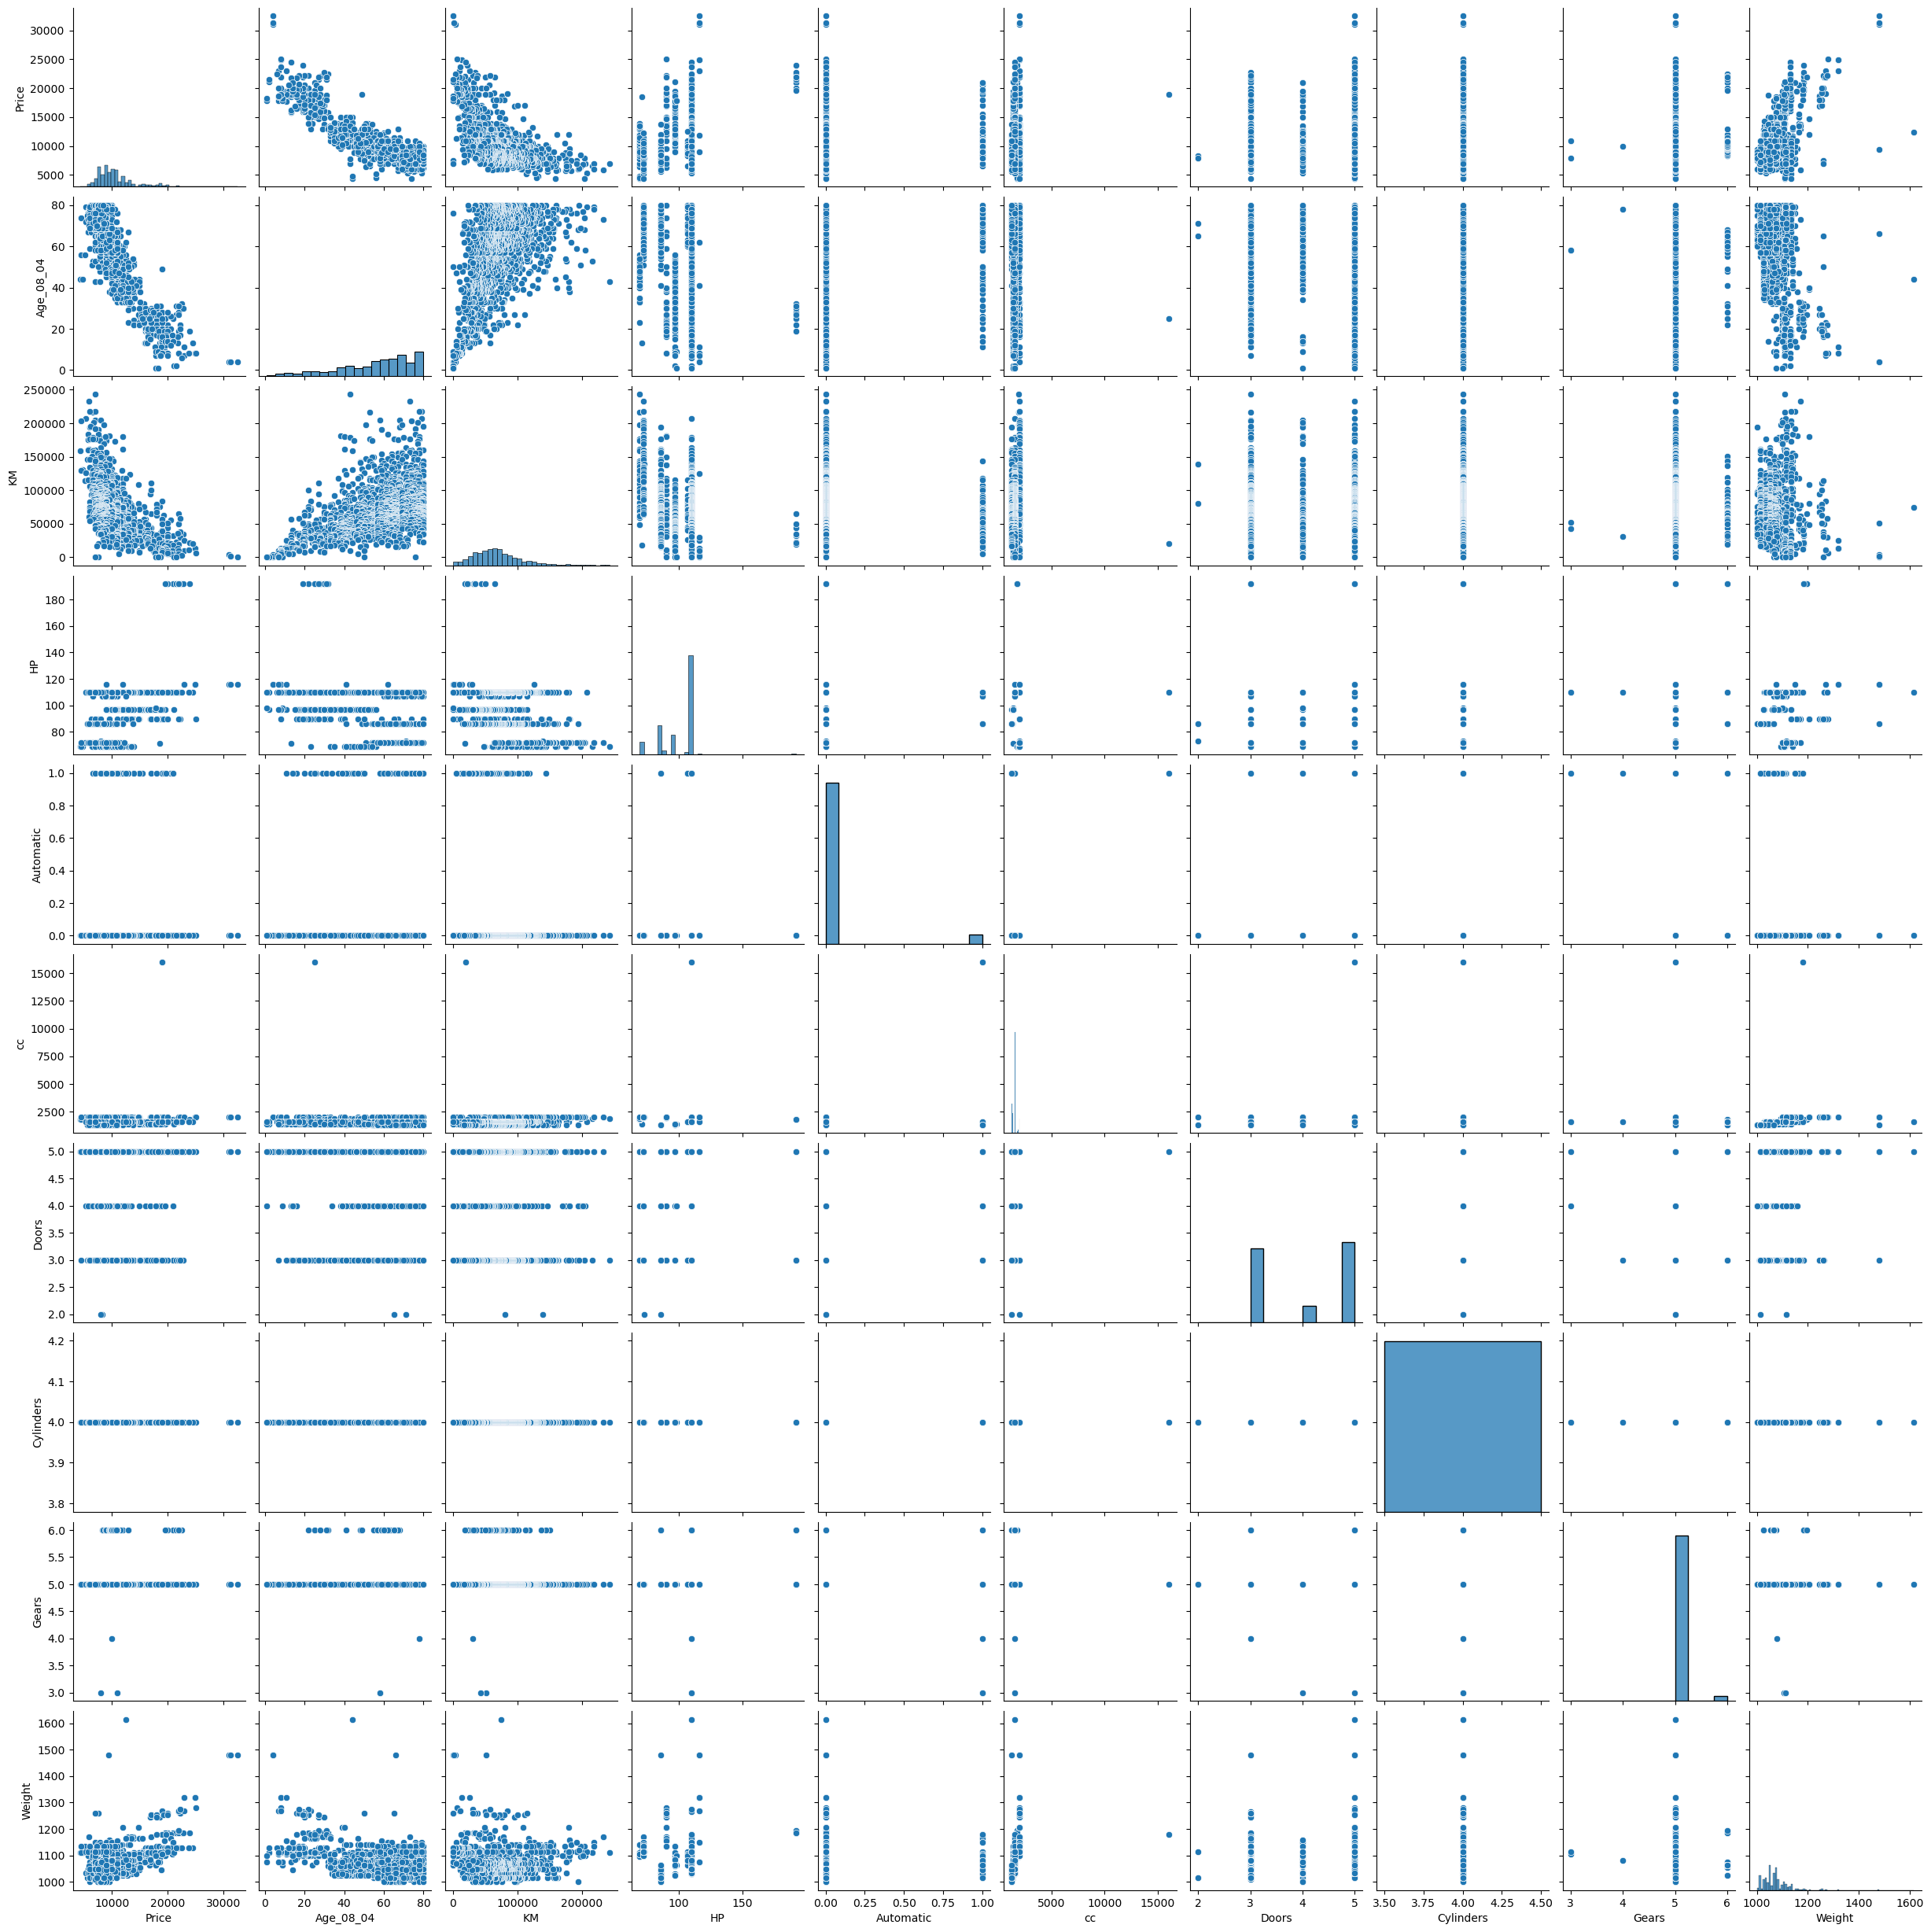

In [5]:
# Exploratory Data Analysis (EDA)
sns.pairplot(df)
plt.show()

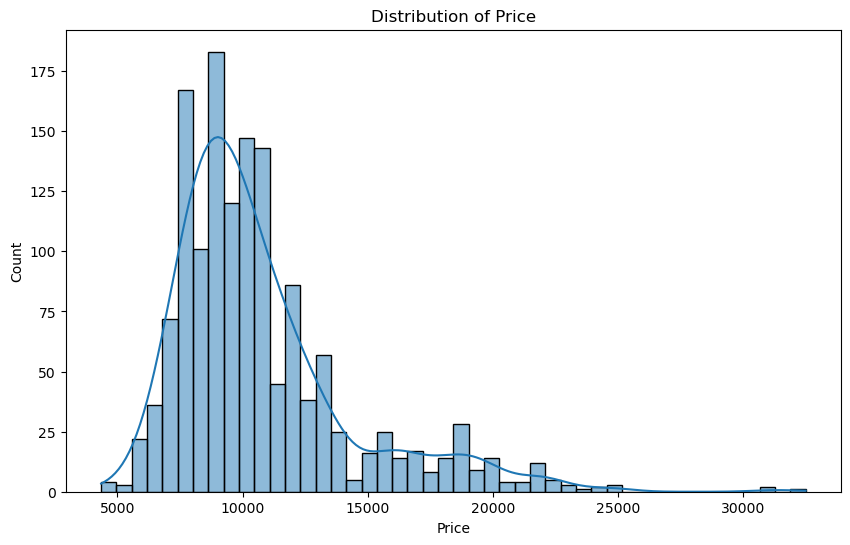

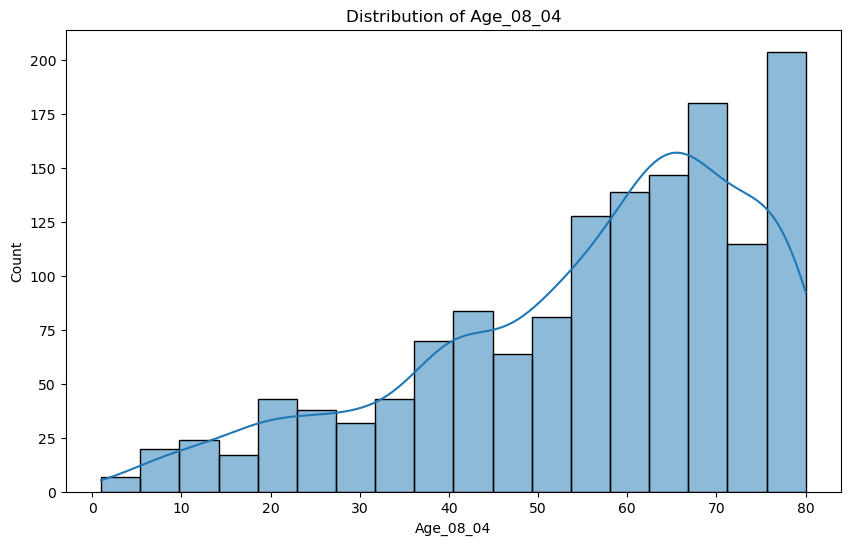

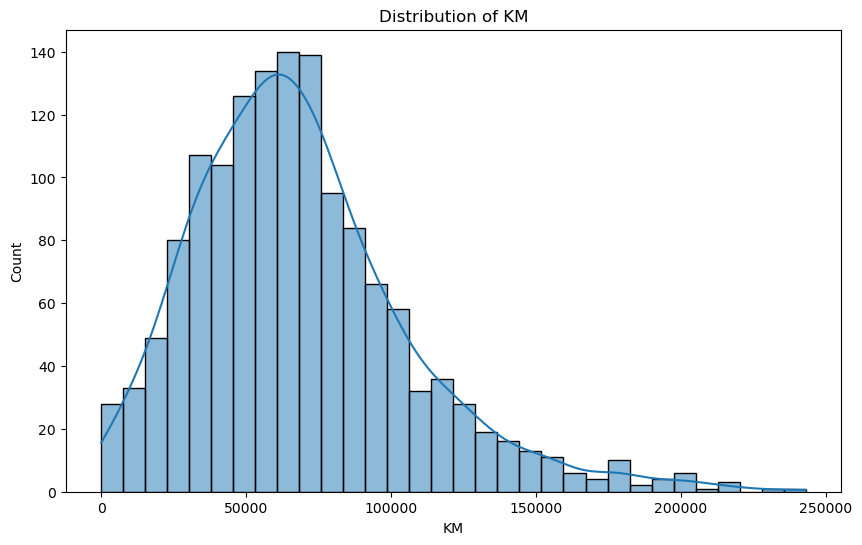

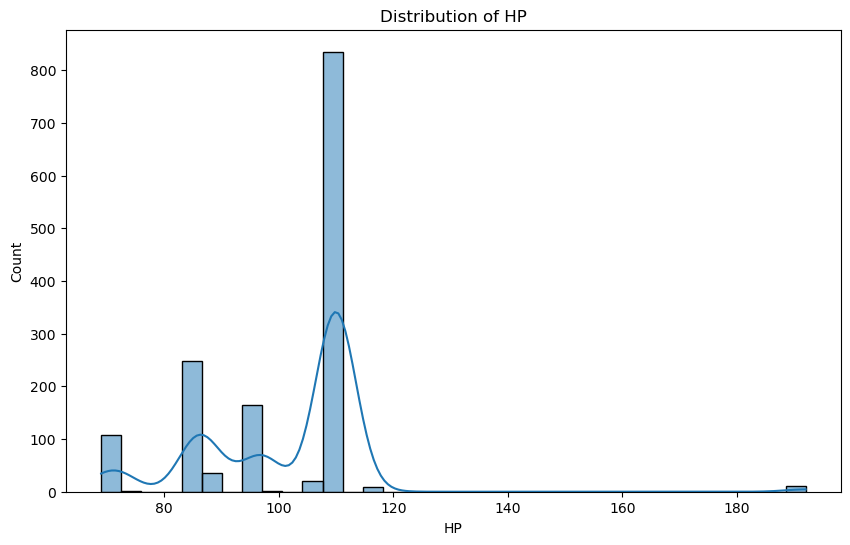

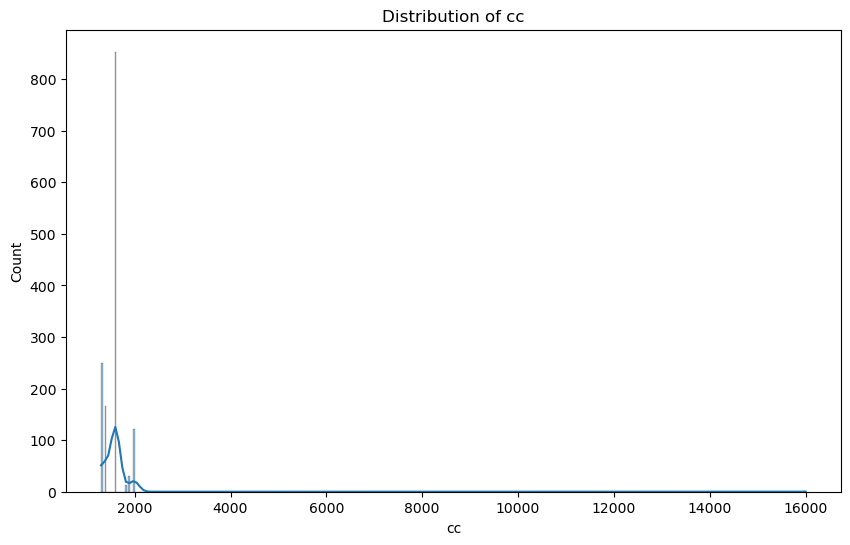

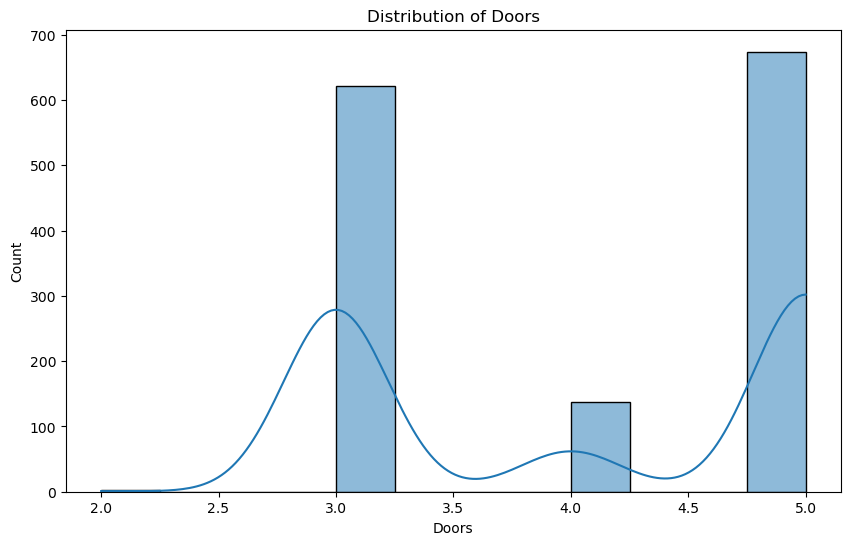

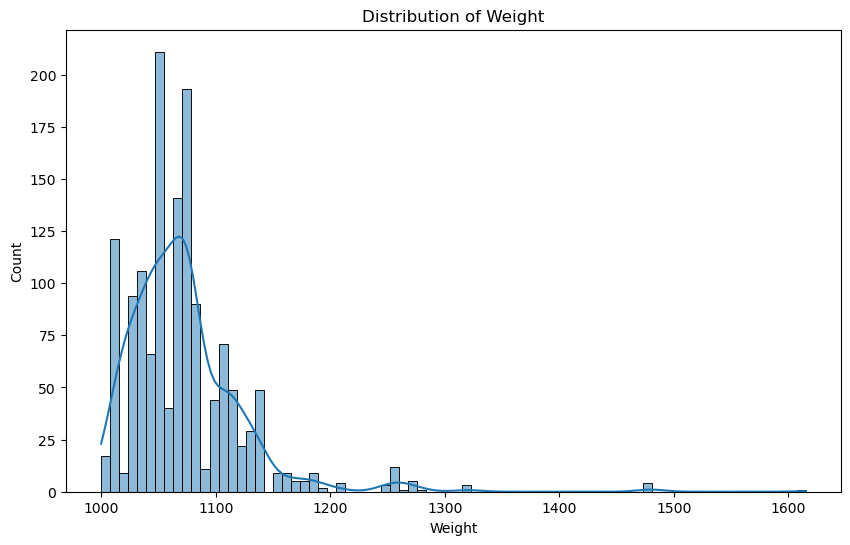

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical features
numerical_features = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']

# Plot distribution for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


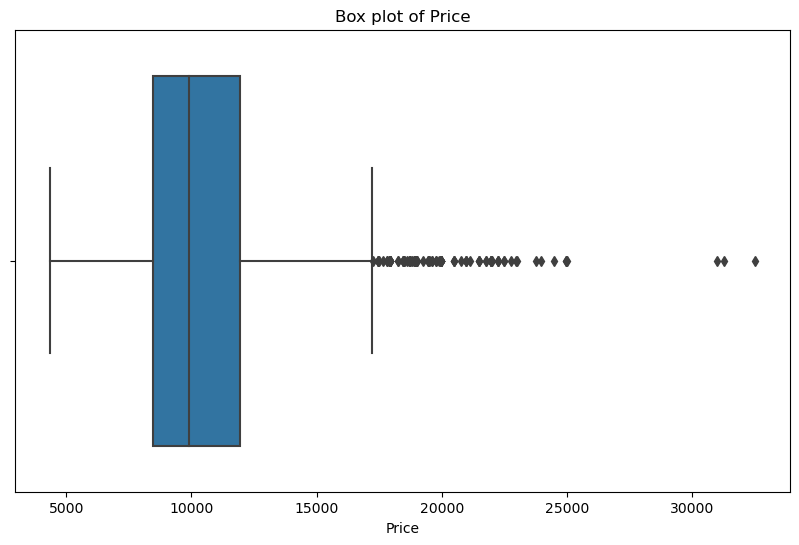

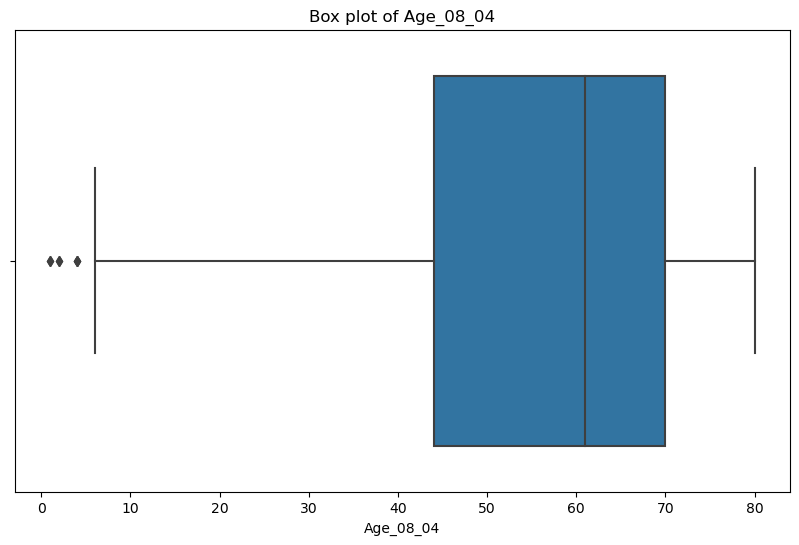

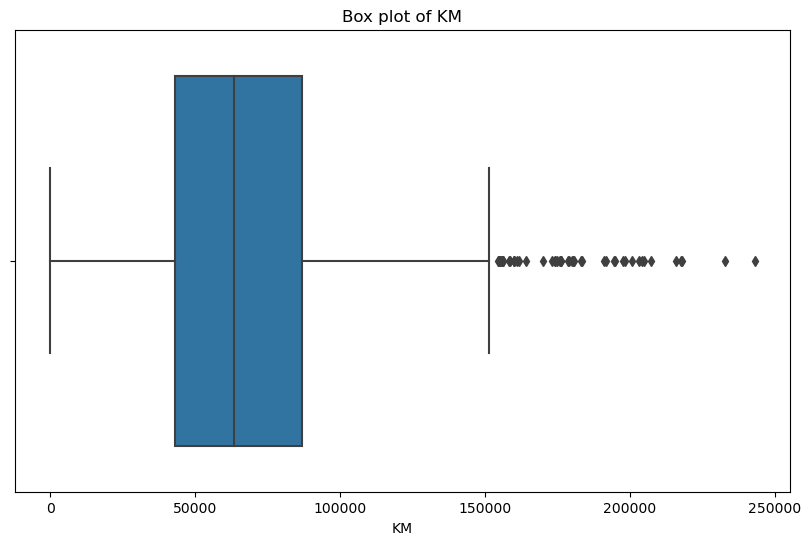

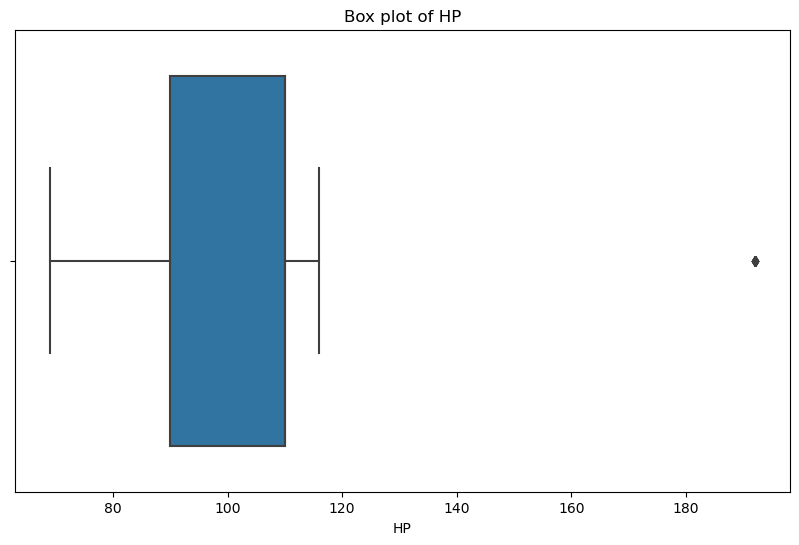

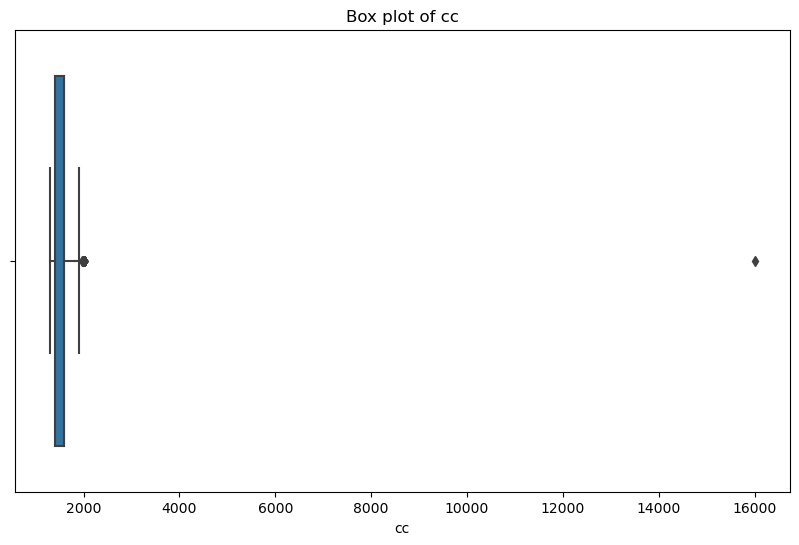

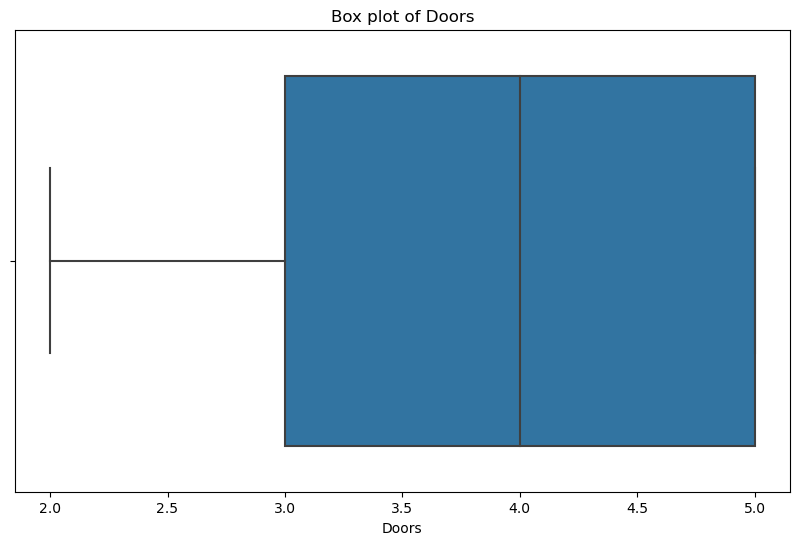

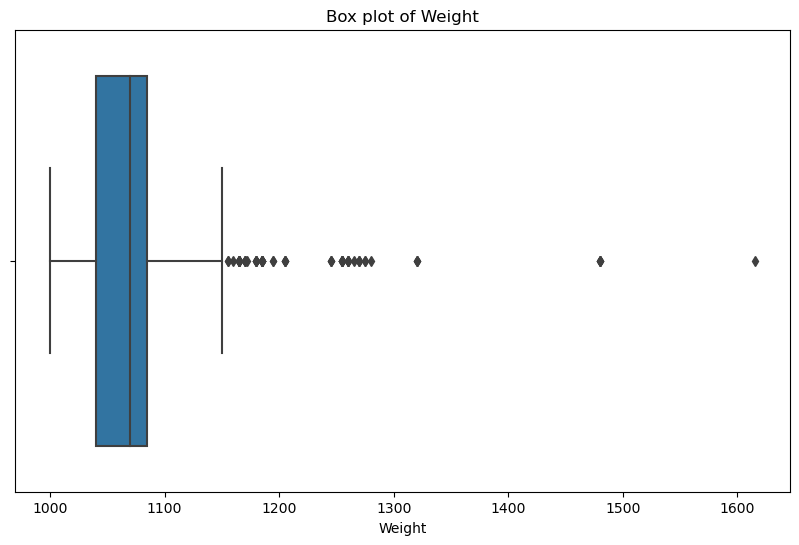

In [22]:
# Box plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

In [25]:
# Print column names to identify the correct name for the fuel type column
print(df.columns)

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')


In [26]:
# Encode categorical variable 'Fuel_Type'
df = pd.get_dummies(df, columns=['Fuel_Type_Diesel', 'Fuel_Type_Petrol'], drop_first=True)

In [28]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel_1,Fuel_Type_Petrol_1
0,13500,23,46986,90,0,2000,3,4,5,1165,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,1


In [30]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

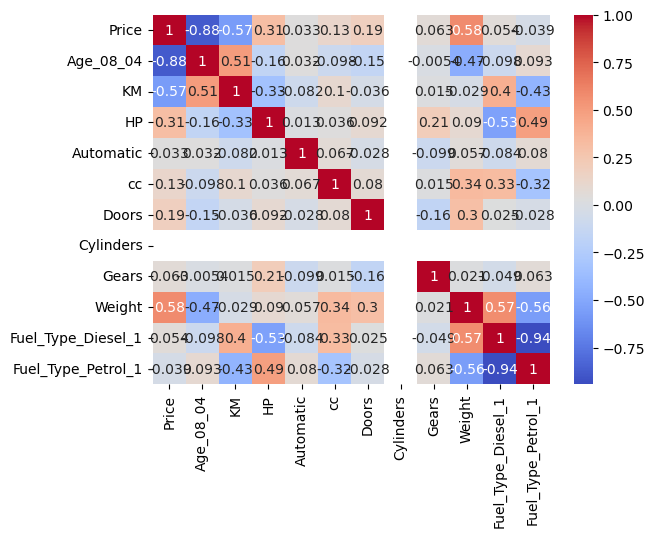

In [32]:
# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [33]:
# Preprocess the data
# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

In [34]:
# Split the data into training and testing sets
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Build and train the multiple linear regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [37]:
# Make predictions
y_pred = lr.predict(X_test_scaled)

In [38]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

MSE: 2203043.823143704
R2 Score: 0.8348888040611082


In [39]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
print(f'Lasso MSE: {mean_squared_error(y_test, y_pred_lasso)}')
print(f'Lasso R2 Score: {r2_score(y_test, y_pred_lasso)}')

Lasso MSE: 2202739.480842682
Lasso R2 Score: 0.8349116135580272


In [40]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
print(f'Ridge MSE: {mean_squared_error(y_test, y_pred_ridge)}')
print(f'Ridge R2 Score: {r2_score(y_test, y_pred_ridge)}')

Ridge MSE: 2200942.8745232937
Ridge R2 Score: 0.8350462635431566
